# Import dependencies

In [2]:
!pip install tensorflow

     ---------------------------------------- 0.0/276.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/276.6 MB 1.3 MB/s eta 0:03:37
     -------------------------------------- 0.1/276.6 MB 787.7 kB/s eta 0:05:52
     -------------------------------------- 0.1/276.6 MB 901.1 kB/s eta 0:05:07
     -------------------------------------- 0.2/276.6 MB 919.0 kB/s eta 0:05:01
     -------------------------------------- 0.2/276.6 MB 888.4 kB/s eta 0:05:12
     -------------------------------------- 0.2/276.6 MB 808.4 kB/s eta 0:05:42
     -------------------------------------- 0.2/276.6 MB 758.5 kB/s eta 0:06:05
     -------------------------------------- 0.3/276.6 MB 714.4 kB/s eta 0:06:27
     -------------------------------------- 0.3/276.6 MB 714.4 kB/s eta 0:06:27
     -------------------------------------- 0.3/276.6 MB 610.3 kB/s eta 0:07:33
     -------------------------------------- 0.3/276.6 MB 610.3 kB/s eta 0:07:33
     -------------------------------------- 0.3

In [12]:
import tensorflow as tf

In [13]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Set up training data

Supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. The task in this Codelab is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists celsius_q and fahrenheit_a that we can use to train our model.

In [14]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


# Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

- input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

- units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [15]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [16]:
model = tf.keras.Sequential([l0])

# Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

Optimizer function — A way of adjusting internal values in order to reduce the loss.

In [17]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

# Train the model

Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [18]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


# Display training statistics

The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

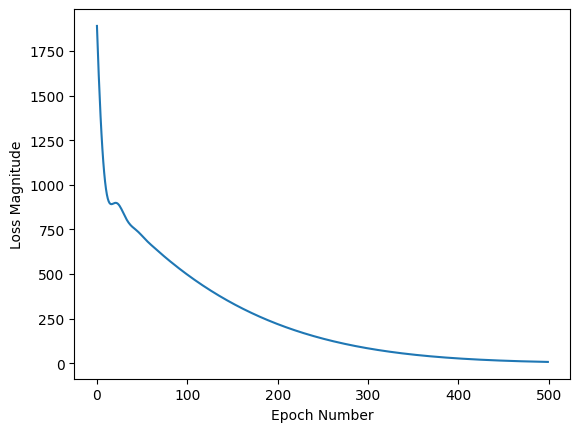

In [19]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

# Use the model to predict values

In [20]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 82ms/step
[[211.33357]]


The correct answer is  100×1.8+32=212 , so our model is doing really well.

# Looking at the layer weights

In [21]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8212248]], dtype=float32), array([29.211084], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line,  y=mx+b , which has the same form as the conversion equation,  f=1.8c+32 .

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

# A little experiment